# faketrix
This library is meant for generating fake emails for a specific topic. We will use the Python library faker to generate fake email addresses and company names and then we will use Ollama with Phi4 to generate the actual email contents.

Once the email is complete we will use Resend to send the email to a specific email address 

In this case, we will be generating fake order emails to request transports. 

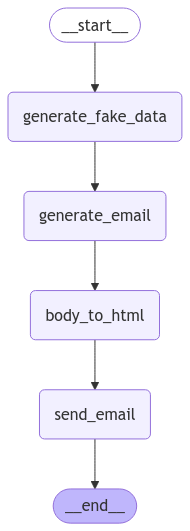

In [1]:
from IPython.display import Markdown, display, Image
from dotenv import load_dotenv
from faketrix.graphs import graph
import os


load_dotenv()


display(Image(graph.get_graph().draw_mermaid_png()))

config = {"configurable": {"sender": os.environ["SENDER_EMAIL"]}}
response = graph.invoke({'recipients': ['ben@vectrix.ai']}, config=config)